## Introduction

This notebook walls through training a decision tree on a data set containing the properites of different mushrooms. [The data can be found here](https://www.kaggle.com/uciml/mushroom-classification). This is a very clean simulated dataset so it's perfect for just jumping straight into playing with algorithms.

The goal will be to train a decision tree capabale of determining if a mushroom is edible or poisonous.

## Set Up
The first step is to load the main modules we will be using. 
- Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools for Python
- NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- matplotlob is a library used for plotting
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The next piece of code is just copy pasted from [scikit_learn]( https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) to make nice confusion matrix plots.


In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## Load and View data

First we load in the data using pandas. [See here for documentation (scroll to bottom to see example)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [94]:
data = pd.read_csv('\\Users\\Mark\\Downloads\\mushroom-classification\\mushrooms.csv')

Next we want to have a first look at how the data looks. [See here for documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [95]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We can see that data is mainly categorical. Lets just double check this quickly

In [96]:
for col in list(data):
    print(col)
    print(data[col].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


## Pre Processing
scikit learn requires that these leters be converted to integers for their implimentation of decision tress so we'll do that now.

In [97]:
from sklearn.preprocessing import LabelEncoder
data['class'] = labelencoder.fit_transform(data['class'])
class_names=labelencoder.inverse_transform([0,1])
labelencoder=LabelEncoder()
for col in data.columns[1:]:
    data[col] = labelencoder.fit_transform(data[col])

In [98]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We can see that all our values are now numeric. 

The next code block just does some plotting so we can see if edible mushrooms have and distinguishing characteristics from poisonous mushrooms. [See here for the seaborn documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

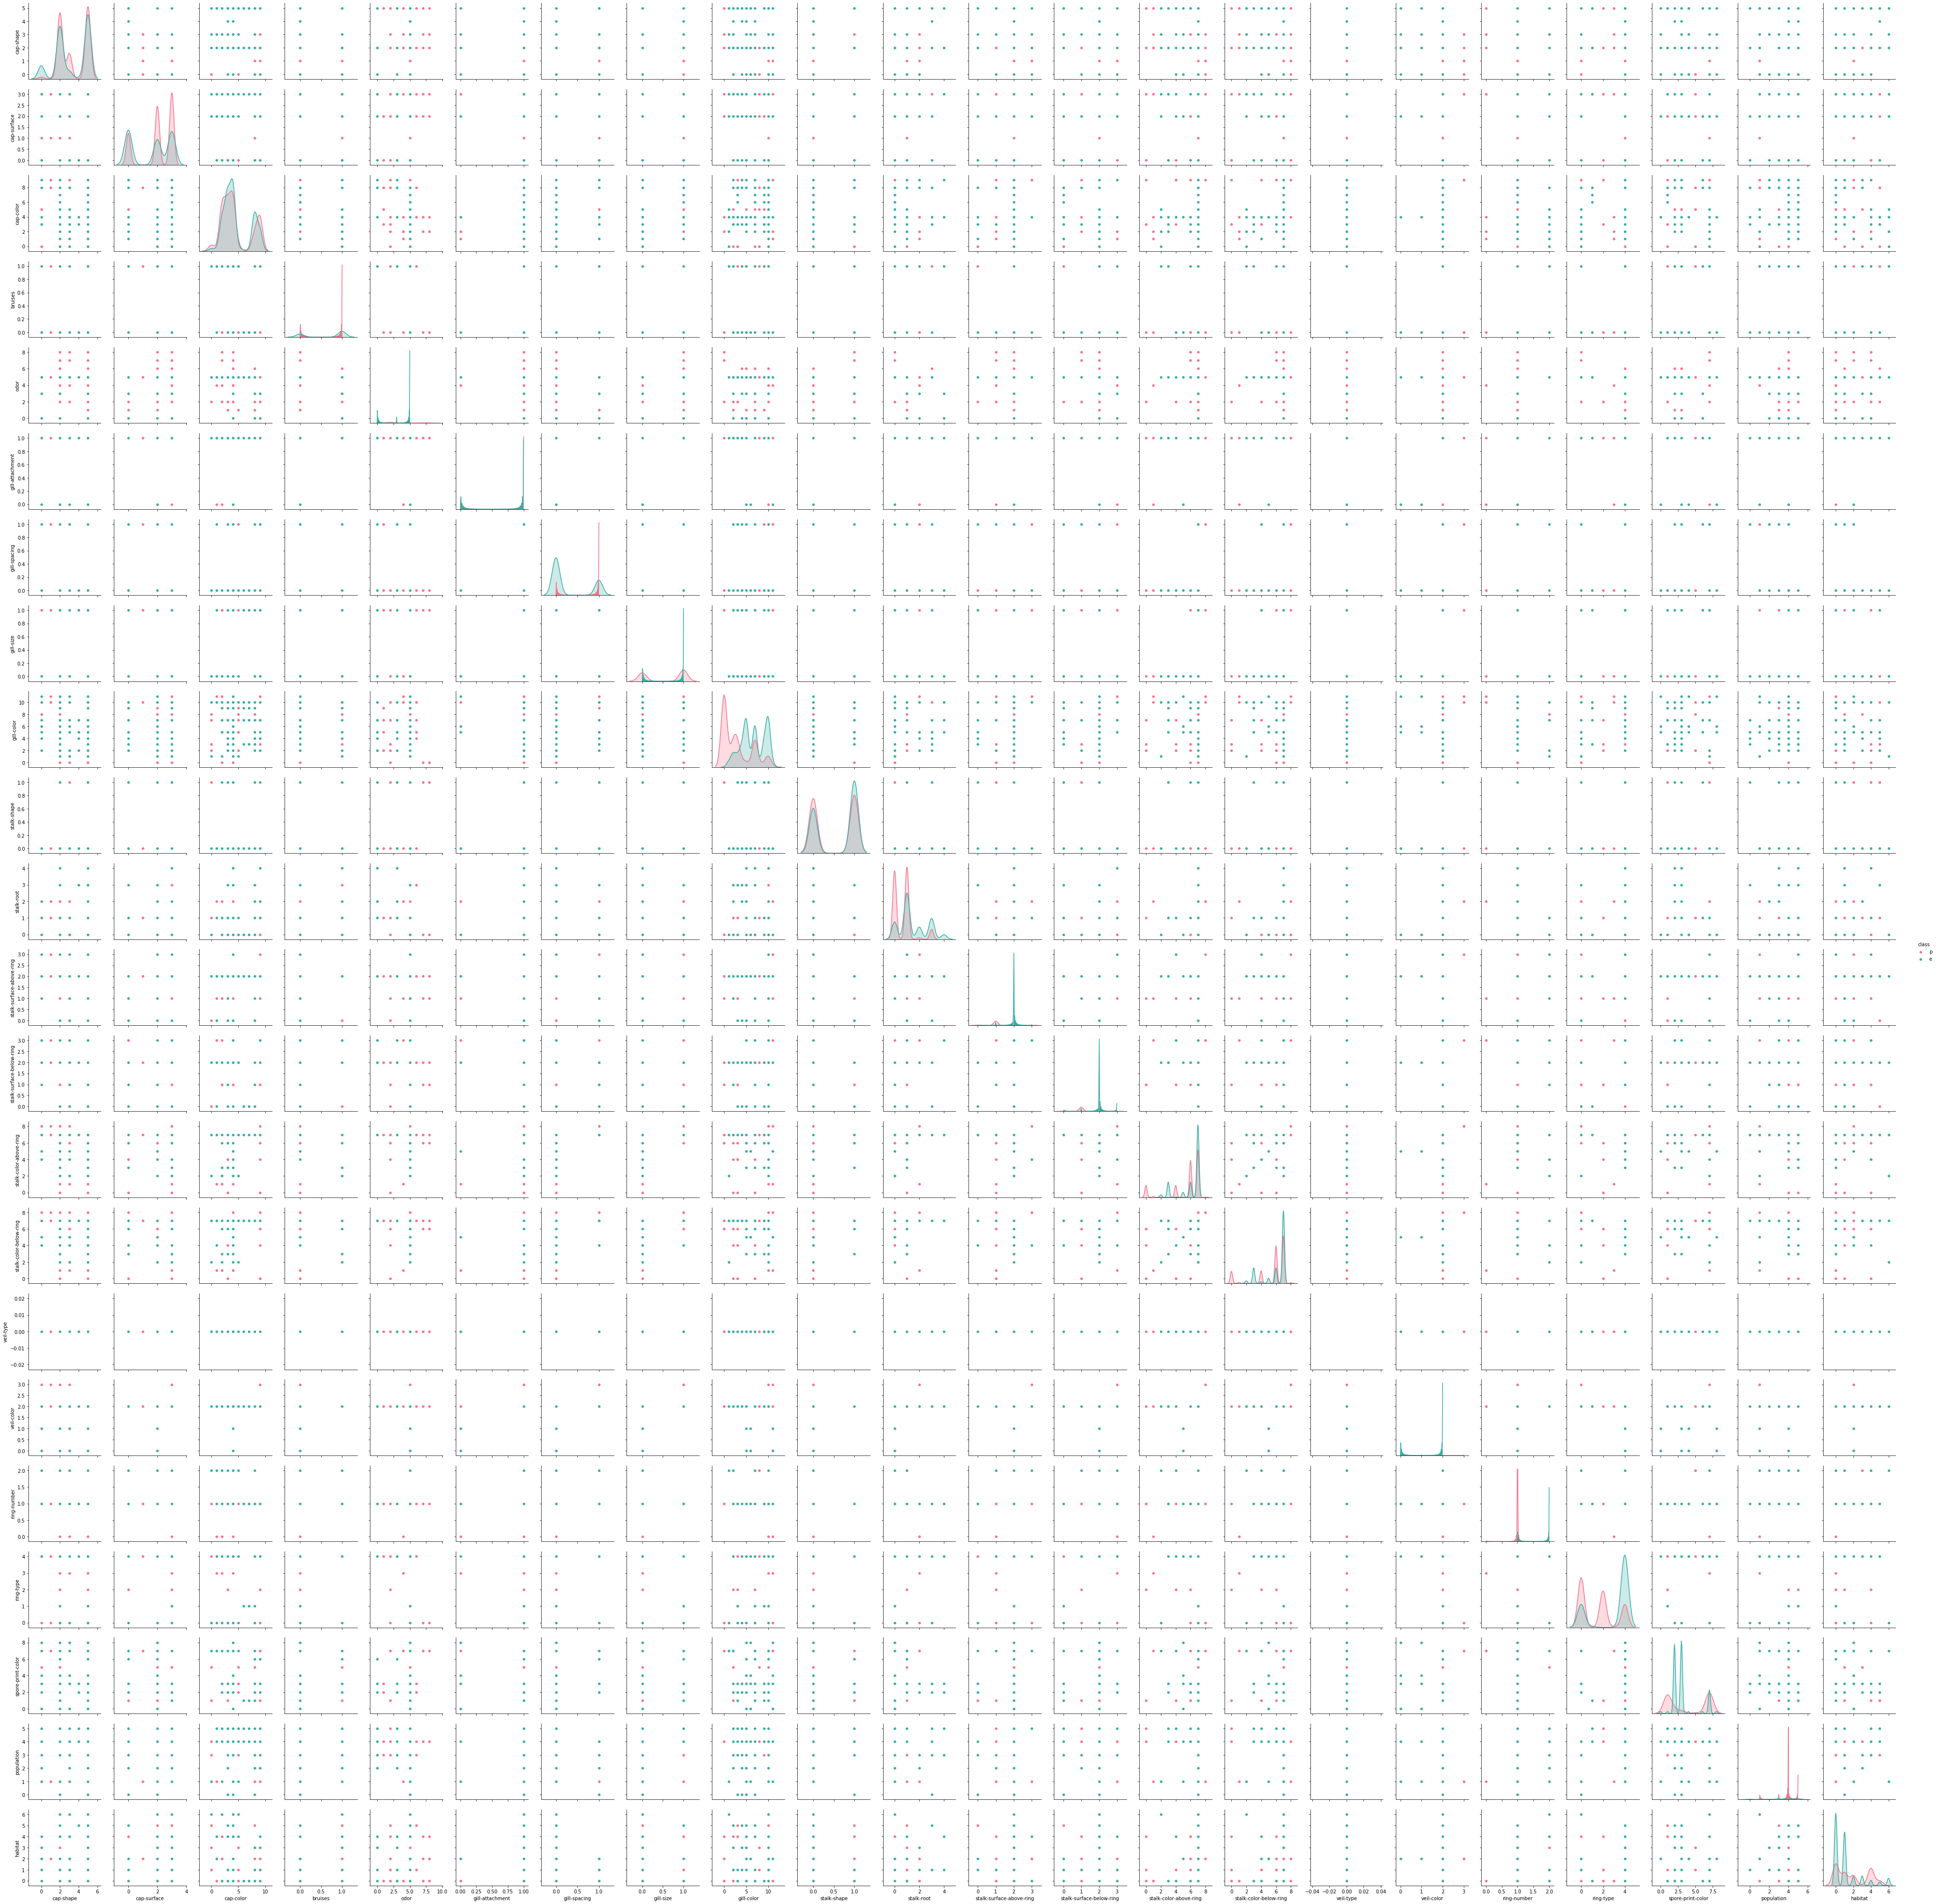

In [58]:
g = sns.pairplot(data, hue="class", palette="husl")

## Train Test Split

Next we split the data into training and test sets. [See here for documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [65]:
from sklearn.model_selection import train_test_split
y=data.pop('class')
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

## Model Fitting

Now we fit a model to the training data. We will use a decision tree. [See section 1.10.1 for how to do this with scikit learn](https://scikit-learn.org/stable/modules/tree.html).

In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Visualise the model

This code block creates a map of our decision tree [See section 1.10.1 for how to do this with graphviz](https://scikit-learn.org/stable/modules/tree.html).

This will tell us what the decision is at each node, how many samples reach the node, how many of each class reach the node, which class has more samples and the color indeicates which class has more samples. Blue represents edible and orange represents posinous. The closer to white the more balanced the sample at that node is. 

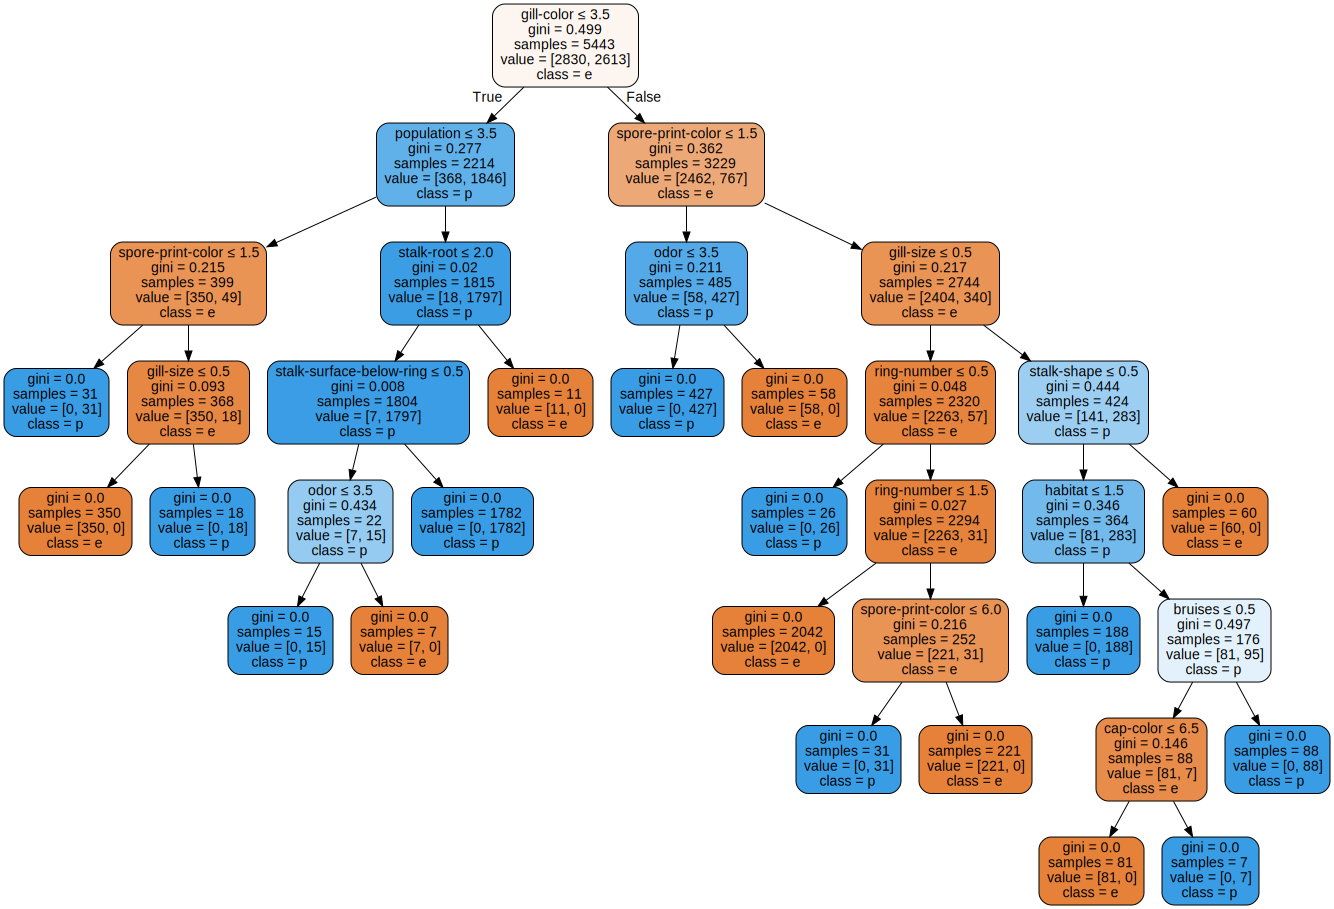

In [99]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=X_train.columns,class_names=class_names, filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Feature Importance

Decision trees naturally provide a measure of feature importance. This block of code is for finding the most important features and plotting the feature importance. 

[Here is a random stack overflow on how to do this](https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python) There might be better ones


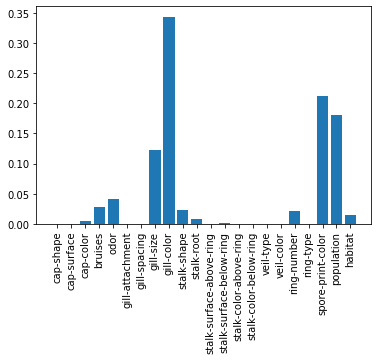

In [71]:

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
_=plt.xticks(range(len(clf.feature_importances_)), X_train.columns, rotation=90)

In [90]:
 def plot_importance(clf, X_train, lower_lim):
    filter=np.where(clf.feature_importances_>lower_lim)
    importances = clf.feature_importances_[filter]
    indices = np.argsort(importances)[::-1]
    names = [X_train.columns[i] for i in indices]
    plt.bar(range(len(importances)), importances[indices])
    _=plt.xticks(range(len(importances)), np.flip(X_train.columns[filter][b]), rotation=90)    
    plt.title("Feature Importance")
    plt.show()

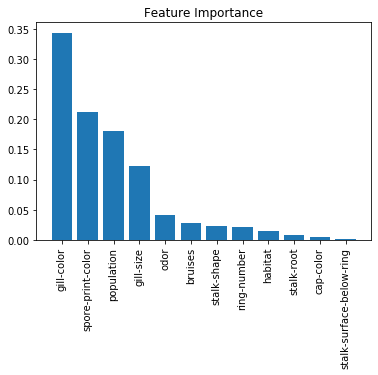

In [91]:
plot_importance(clf, X_train,0)

## Evaluate

How well did we do. If we trust our model and eat all the predicted edible mushrooms in our test dataset will we survive?

Evaluate the model here. Resources:

- [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
- [scikit learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

Confusion matrix, without normalization
[[1378    0]
 [   0 1303]]


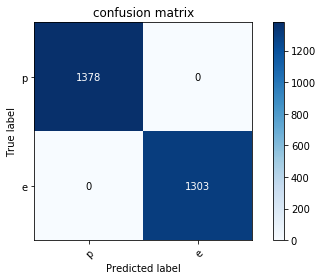

In [117]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred,classes=class_names, normalize=False, title='confusion matrix')